# Pytorch Linear and Non-Linear Systems
Joelle Bailey (800984146) for ECGR 4105 HW5

In [1]:
import torch
import torch.optim as optim
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Temperature data set up

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]


t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u

In [3]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
def plot_results(t_p, t_u, t_c):
    fig = plt.figure(dpi = 600)
    plt.xlabel("Temp deg F")
    plt.ylabel("Temp deg C")
    plt.plot(t_u.numpy(), t_p.detach().numpy())
    plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [6]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)

In [7]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([3.6181e+05, 2.3149e+07, 5.9642e+03])

In [8]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    optimizer = optim.Adam([params], lr = learning_rate)
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [9]:
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
for i in learning_rates:
    print('Learning Rate ', str(i).format())
    training_loop(
        n_epochs = 5000,
        learning_rate = i,
        params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True),
        t_u = t_un,
        t_c = t_c)

Learning Rate  0.1
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Learning Rate  0.01
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Learning Rate  0.001
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Learning Rate  0.0001
Epoch 500, Loss 10.564581
Epoch 1000, Loss 8.369857
Epoch 1500, Loss 6.819551
Epoch 2000, Loss 5.736063
Epoch 2500, Loss 4.984946
Epoch 3000, Loss 4.468117
Epoch 3500, Loss 4.115160
Epoch 4000, Loss 3.876006
Epoch 4500, Loss 3.715267
Epoch 5000, Loss 3.608049
Learning Rate  1e-05
Epoch 500,

Learning Rate  0.0001
Epoch 500, Loss 10.564581
Epoch 1000, Loss 8.369857
Epoch 1500, Loss 6.819551
Epoch 2000, Loss 5.736063
Epoch 2500, Loss 4.984946
Epoch 3000, Loss 4.468117
Epoch 3500, Loss 4.115160
Epoch 4000, Loss 3.876006
Epoch 4500, Loss 3.715267
Epoch 5000, Loss 3.608049


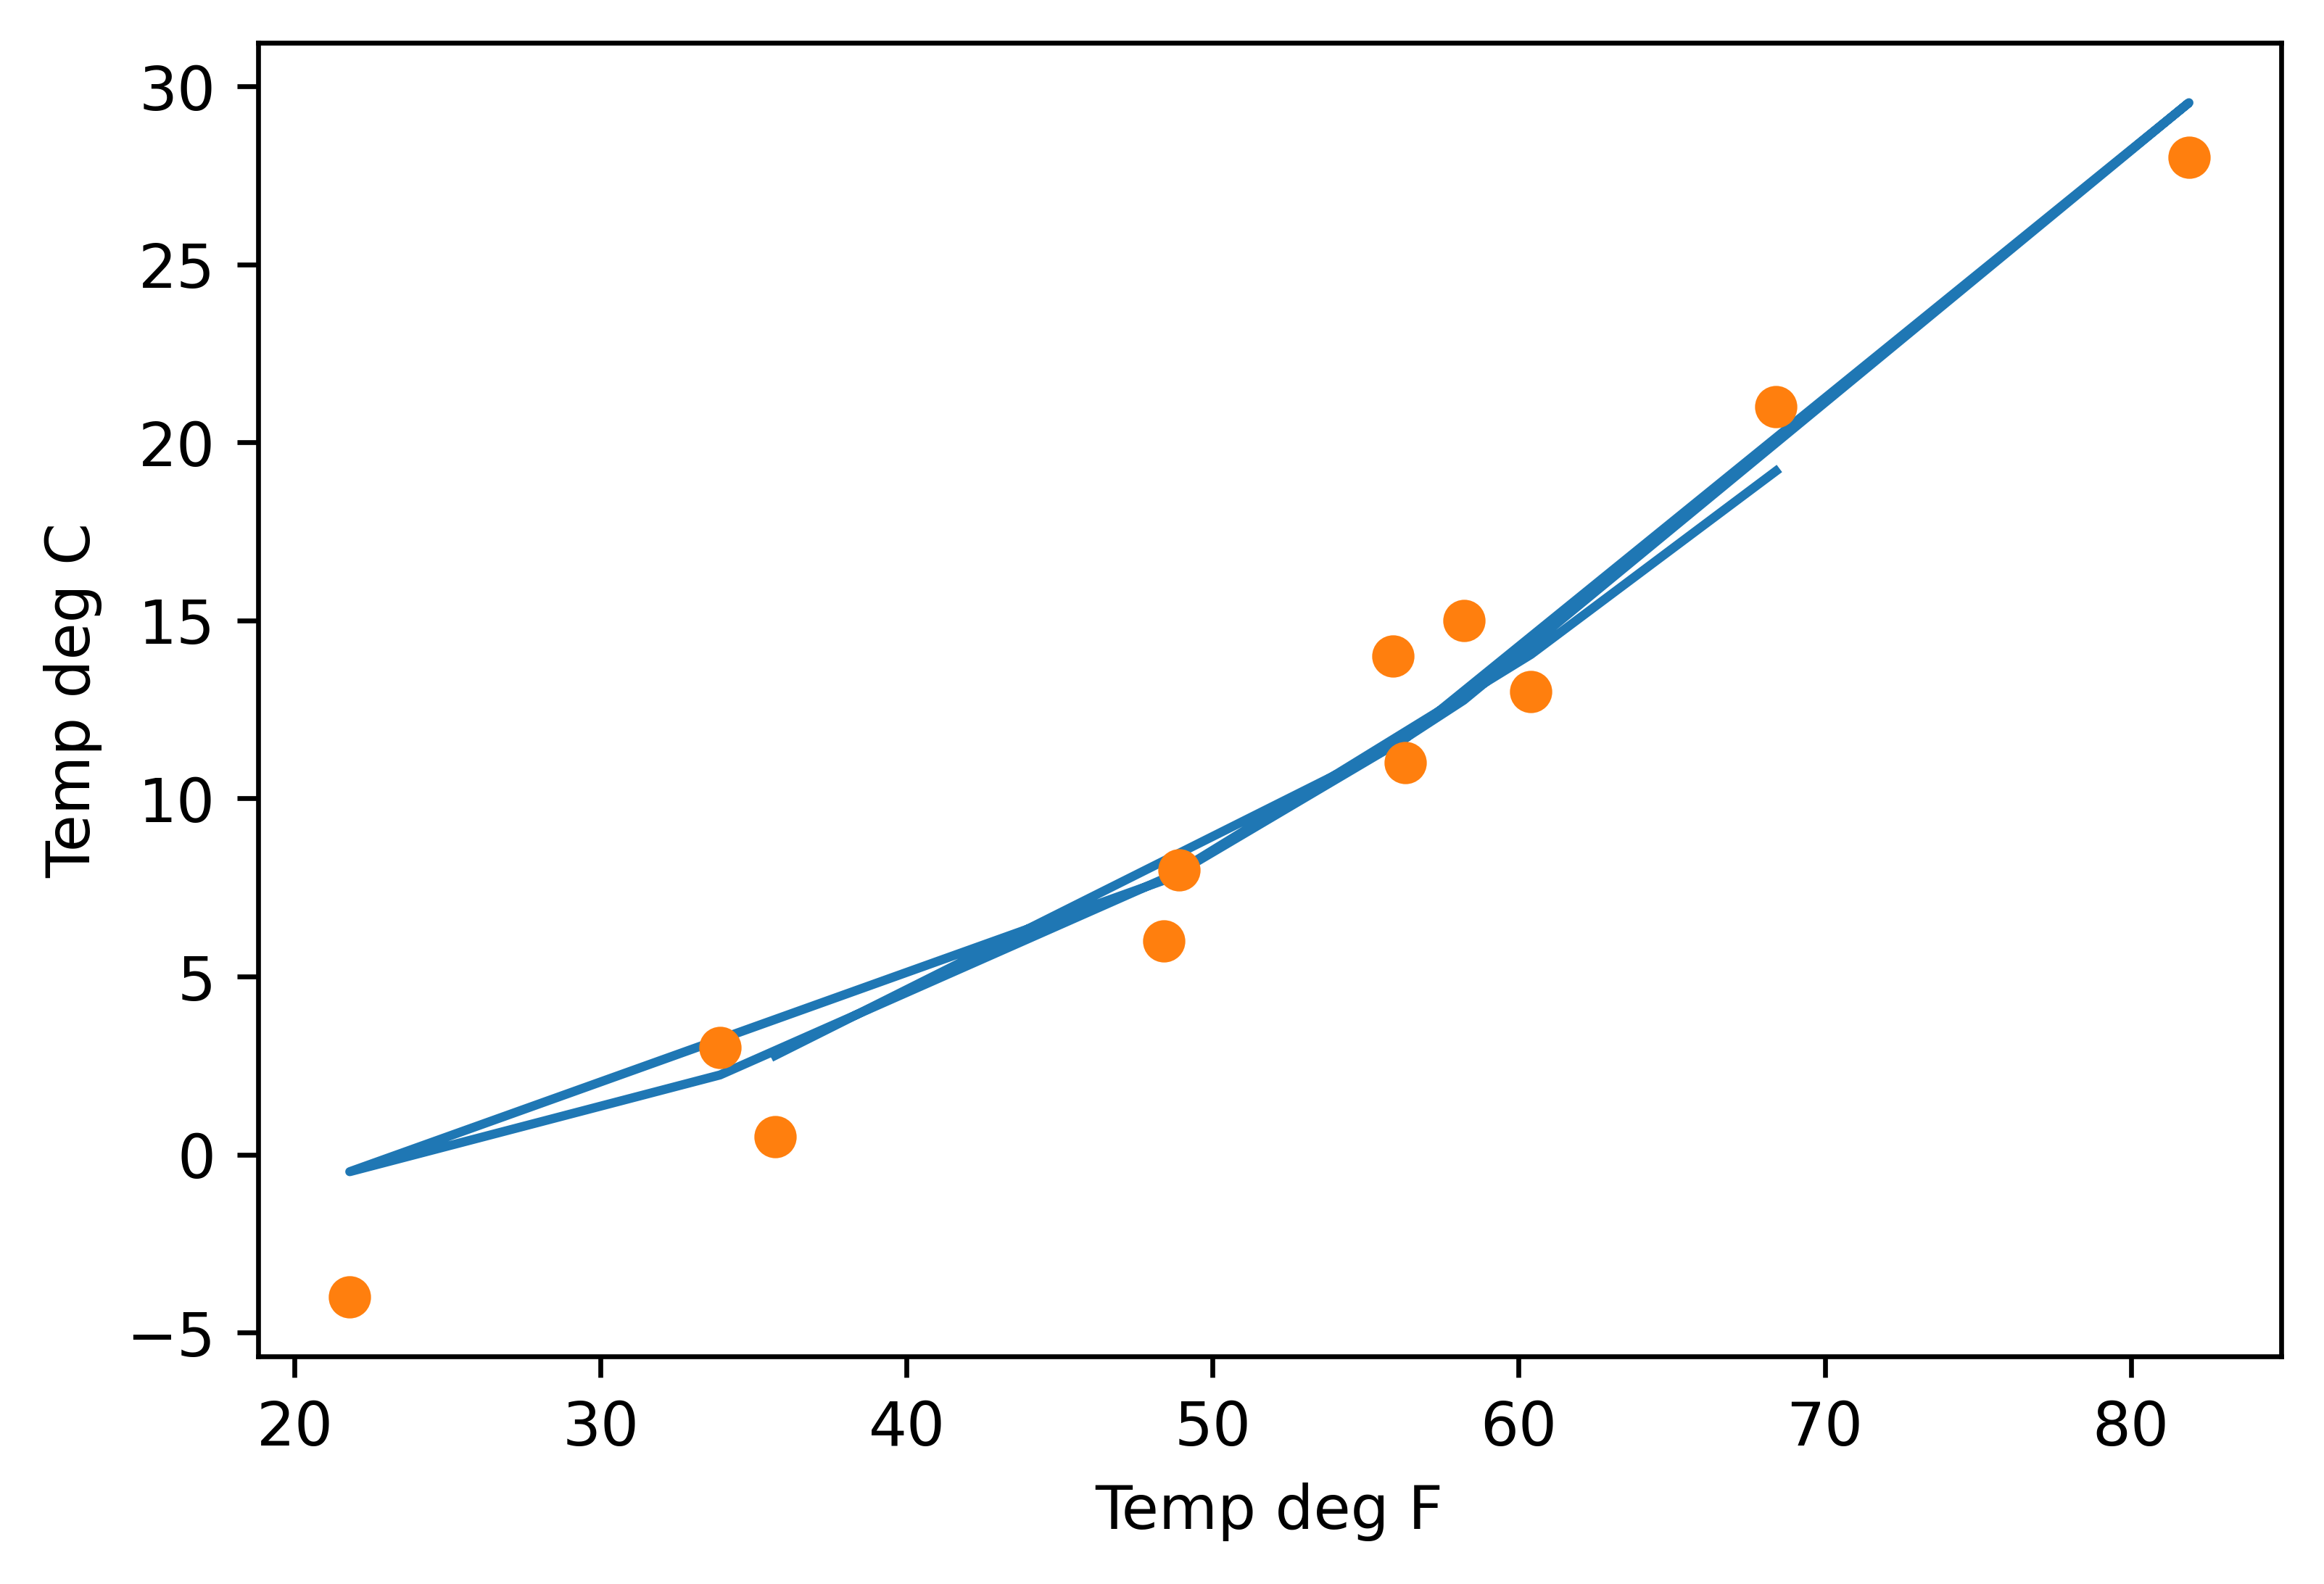

In [10]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
print('Learning Rate ', 0.0001)
training_loop(
        n_epochs = 5000,
        learning_rate = 0.0001,
        params = params,
        t_u = t_un,
        t_c = t_c)

plot_results(model(t_un, *params), t_u, t_c)

In [11]:
df = pd.read_csv("Housing.csv")

In [12]:
# Binary mapping Yes and No to 1 and 0
colToMap = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no':0})

df[colToMap] = df[colToMap].apply(binary_map)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [13]:
col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_col = df[col]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_col = scaler.fit_transform(df_col)

In [14]:
# Housing data set up
t_u = torch.tensor(df_col[:,:5])
t_c = torch.tensor(df_col[:,5])



n_samples = t_c.shape[0]
n_val = int(0.2*n_samples)   # for a 20% valiadation split

shuffled_index = torch.randperm(n_samples)

train_index = shuffled_index[:n_val]
val_index = shuffled_index[-n_val:]

In [15]:
params_h = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad = True)

# Train test split
t_u_train = t_u[train_index]
t_u_val = t_u[val_index]
t_c_train = t_c[train_index]
t_c_val = t_c[val_index]

In [16]:
def model2(t_in, w1, w2, w3, w4, w5, b):
    return  t_in[:,0]*w1 + t_in[:,1]*w2 + t_in[:,2]*w3 + t_in[:,3]*w4 + t_in[:,4]*w5 + b

In [17]:
def training_loop_2(n_epochs, learning_rate, params, t_u_train, t_u_val, t_c_train, t_c_val):
    optimizer = optim.Adam([params], lr = learning_rate)
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        t_p = model2(t_u_train, *params)
        loss_train = loss_fn(t_p, t_c_train)
        
        t_p_val = model2(t_u_val, *params)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        loss_train.backward()
        optimizer.step()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print('Epoch %d, Training Loss %f, Validation Loss %f' % (epoch, float(loss_train), float(loss_val)))
    return params

In [18]:
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
for i in learning_rates:
    print('Learning Rate ', str(i).format())
    training_loop_2(
        n_epochs = 5000,
        learning_rate = i,
        params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad = True),
        t_u_train = t_u_train,
        t_u_val = t_u_val,
        t_c_train = t_c_train,
        t_c_val = t_c_val)

Learning Rate  0.1
Epoch 500, Training Loss 0.408301, Validation Loss 0.440694
Epoch 1000, Training Loss 0.408301, Validation Loss 0.440694
Epoch 1500, Training Loss 0.408301, Validation Loss 0.440694
Epoch 2000, Training Loss 0.408301, Validation Loss 0.440694
Epoch 2500, Training Loss 0.408301, Validation Loss 0.440694
Epoch 3000, Training Loss 0.408301, Validation Loss 0.440694
Epoch 3500, Training Loss 0.408301, Validation Loss 0.440694
Epoch 4000, Training Loss 0.408301, Validation Loss 0.440694
Epoch 4500, Training Loss 0.408301, Validation Loss 0.440694
Epoch 5000, Training Loss 0.408301, Validation Loss 0.440694
Learning Rate  0.01
Epoch 500, Training Loss 0.408301, Validation Loss 0.440695
Epoch 1000, Training Loss 0.408301, Validation Loss 0.440694
Epoch 1500, Training Loss 0.408301, Validation Loss 0.440694
Epoch 2000, Training Loss 0.408301, Validation Loss 0.440694
Epoch 2500, Training Loss 0.408301, Validation Loss 0.440694
Epoch 3000, Training Loss 0.408301, Validation L

In [19]:
import torch.nn as nn

In [20]:
linear_model = nn.Sequential(
    nn.Linear(5, 8, dtype = torch.float64),
    nn.ReLU(),
    nn.Linear(8, 5, dtype = torch.float64),
    nn.ReLU(),
    nn.Linear(5, 1, dtype = torch.float64))

linear_model(t_u_val);

In [21]:
def training_loop_3(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):            
            
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        loss_train.backward()
        optimizer.step()
                    
        if epoch % 50 == 0:
            print('Epoch %d, Training Loss %f, Validation Loss %f' % (epoch, float(loss_train), float(loss_val)))

In [22]:
import time
training_1hidden_start_time = time.time()

training_loop_3(
    n_epochs = 200,
    optimizer = optim.Adam(linear_model.parameters(), lr = 0.0001),
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_u_train,
    t_u_val = t_u_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)
print('Training finished, took {:.2f}s'.format(time.time() - training_1hidden_start_time))

Epoch 50, Training Loss 1.079467, Validation Loss 0.925515
Epoch 100, Training Loss 1.077545, Validation Loss 0.918472
Epoch 150, Training Loss 1.076309, Validation Loss 0.914115
Epoch 200, Training Loss 1.075584, Validation Loss 0.911466
Training finished, took 0.36s


In [23]:
linear_model_2 = nn.Sequential(
    nn.Linear(5, 8, dtype = torch.float64),
    nn.ReLU(),
    nn.Linear(8, 32, dtype = torch.float64),
    nn.Tanh(),
    nn.Linear(32, 16, dtype = torch.float64),
    nn.ReLU(),
    nn.Linear(16, 8, dtype = torch.float64),
    nn.Tanh(),
    nn.Linear(8, 1, dtype = torch.float64),
    nn.ReLU())
linear_model_2(t_u_val);

In [24]:
import time
training_3hidden_start_time = time.time()

training_loop_3(
    n_epochs = 200,
    optimizer = optim.Adam(linear_model.parameters(), lr = 0.0001),
    model = linear_model_2,
    loss_fn = nn.MSELoss(),
    t_u_train = t_u_train,
    t_u_val = t_u_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)
print('Training finished, took {:.2f}s'.format(time.time() - training_3hidden_start_time))

Epoch 50, Training Loss 1.075640, Validation Loss 0.905416
Epoch 100, Training Loss 1.075640, Validation Loss 0.905416
Epoch 150, Training Loss 1.075640, Validation Loss 0.905416
Epoch 200, Training Loss 1.075640, Validation Loss 0.905416
Training finished, took 0.58s
